# Import Libs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
from joblib import load
from keras.models import load_model

# Read Data

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
value_counts = df['Exited'].value_counts()
value_counts

,count
Exited,
0,7963
1,2037


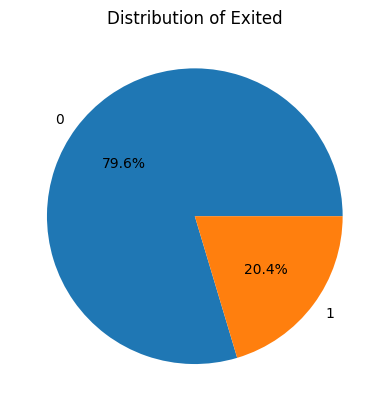

In [4]:
labels = value_counts.index
counts = value_counts.values
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Exited')
plt.show()

# Equalize Data

In [5]:

input_columns = df.drop('Exited', axis=1)

class_column = df['Exited']

oversampler = RandomOverSampler(random_state=0)

input_columns_resampled, class_column_resampled = oversampler.fit_resample(input_columns, class_column)

df_balanced = pd.concat([input_columns_resampled, class_column_resampled],axis=1)

class_distribution = df_balanced['Exited'].value_counts()
print(class_distribution)

Exited
1    7963
0    7963
Name: count, dtype: int64


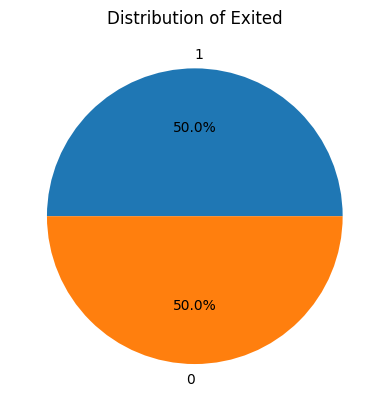

In [6]:
value_counts = df_balanced['Exited'].value_counts()

labels = value_counts.index

counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of Exited')

plt.show()

In [7]:
X = df_balanced.iloc[:, 3:13].values

In [8]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [565 'Germany' 'Male' ... 1 0 175070.94]
 [553 'Spain' 'Female' ... 0 1 30730.95]
 [492 'France' 'Female' ... 1 1 182865.09]]


In [9]:
y = df_balanced.iloc[:, 13].values
print(y)

[1 0 1 ... 1 1 1]


In [10]:
labelencoder_gender = LabelEncoder()
X[:, 2] = labelencoder_gender.fit_transform(X[:, 2])

In [11]:
print(X[:, 2])

[0 0 0 ... 1 0 0]


In [12]:
labelencoder_gender.transform(["Male","Female"])

array([1, 0])

In [13]:
distinct_values = np.unique(X[:, 1])
print(distinct_values)

['France' 'Germany' 'Spain']


In [14]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')

X = ct.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state =0)

In [16]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Fix Random Seed

In [17]:
np.random.seed(42)

tf.random.set_seed(42)

# Build Model

In [18]:
model = Sequential()

In [19]:
input_dim=len(X_train[0])

model.add(Dense(6, activation = 'relu', input_dim = input_dim))

model.add(Dense(6, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127 (508.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [22]:
model.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6028 - loss: 0.6895
Epoch 2/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7201 - loss: 0.5626
Epoch 3/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7447 - loss: 0.5267
Epoch 4/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7618 - loss: 0.4970
Epoch 5/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7691 - loss: 0.4759
Epoch 6/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7702 - loss: 0.4652
Epoch 7/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7743 - loss: 0.4603
Epoch 8/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7738 - loss: 0.4578
Epoch 9/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7756 - loss: 0.4563
Epoch 10/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7788 - loss: 0.4555
Epoch 11/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7783 - loss: 0.4547
Epoch 12/20
1195/1195 ━━━━━━━━

# Evaluation (Testing)

In [23]:
evaluation = model.evaluate(X_test, y_test)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7725 - loss: 0.4600
Loss: 0.4629802405834198
Accuracy: 0.7762430906295776


# Predict

In [24]:
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# Calculate Accuracy

In [25]:
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

Accuracy: 0.7762430939226519
Precision: 0.7840327533265097
Recall: 0.7656171914042978
F1 Score: 0.7747155499367889


# Build Model

In [26]:
model = Sequential()

input_dim=len(X_train[0])

model.add(Dense(128, activation = 'relu', input_dim = input_dim))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(32, activation = 'relu'))

model.add(Dense(16, activation = 'relu'))

model.add(Dense(8, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy' ])

model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1195/1195 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7224 - loss: 0.5443
Epoch 2/100
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7794 - loss: 0.4530
Epoch 3/100
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7896 - loss: 0.4356
Epoch 4/100
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7957 - loss: 0.4209
Epoch 5/100
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8103 - loss: 0.4039
Epoch 6/100
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8144 - loss: 0.3908
Epoch 7/100
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8266 - loss: 0.3753
Epoch 8/100
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8327 - loss: 0.3611
Epoch 9/100
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8435 - loss: 0.3464
Epoch 10/100
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8503 - loss: 0.3317
Epoch 11/100
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.3160
Epoch 12/100
1195/1195 ━━━━━━━━

# Predict

In [27]:
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: 0.9010547463586137


# Calculate Accuracy

In [28]:
precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

Precision: 0.8531868131868132
Recall: 0.9700149925037481
F1 Score: 0.9078578110383536


# Save Model

In [29]:
model.save("churn_model.h5")

# Save Label Encoder

In [30]:
dump(labelencoder_gender, "churn_label_encoder.pkl")

['churn_label_encoder.pkl']

# Save Column Transformer

In [31]:
dump(ct, "churn_column_transformer.pkl")


['churn_column_transformer.pkl']

# Save Standard Scaler

In [32]:
dump(sc, "churn_standard_scaler.pkl")


['churn_standard_scaler.pkl']

# Test new Data

In [33]:
new_customer = np.array( [[600,"France","Male",40, 3, 60000, 2, 1, 1, 50000]])

In [34]:
labelencoder_gender_loaded=load("churn_label_encoder.pkl")

In [35]:
new_customer[:, 2] = labelencoder_gender_loaded.transform(new_customer[:, 2])

In [36]:
ct_loaded = load("churn_column_transformer.pkl")
new_customer = ct.transform(new_customer)

In [37]:
sc_loaded = load("churn_standard_scaler.pkl")

new_customer = sc_loaded.transform(new_customer)
print(new_customer)

[[ 1.07479237 -0.6660016  -0.54458213 -0.49084051  0.98454672 -0.10120986
  -0.67592971 -0.35207194  0.73346722  0.64407345  1.08132784 -0.88180893]]


In [38]:
loaded_model = load_model("churn_model.h5")

In [39]:
new_prediction_proba = loaded_model.predict(new_customer)

new_prediction = (new_prediction_proba > 0.5)

print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
[[False]]
